<a href="https://colab.research.google.com/github/infiniteoverflow/Horse-vs-Human/blob/master/horsehuman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Downloading the train set
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-04-03 16:37:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   200MB/s    in 0.7s    

2020-04-03 16:37:04 (200 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [4]:
# Downloading the validation set
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-04-03 16:37:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2020-04-03 16:37:06 (127 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
# Unzipping the downloaded dataset

import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse09-0.png', 'horse06-3.png', 'horse14-8.png', 'horse18-9.png', 'horse01-9.png', 'horse05-6.png', 'horse50-9.png', 'horse03-8.png', 'horse43-6.png', 'horse26-7.png']
['human01-13.png', 'human11-08.png', 'human14-20.png', 'human12-15.png', 'human10-20.png', 'human02-27.png', 'human14-22.png', 'human05-19.png', 'human03-11.png', 'human07-27.png']
['horse4-000.png', 'horse5-342.png', 'horse1-127.png', 'horse5-565.png', 'horse4-102.png', 'horse4-159.png', 'horse5-181.png', 'horse5-076.png', 'horse1-122.png', 'horse5-360.png']
['valhuman02-10.png', 'valhuman02-12.png', 'valhuman05-26.png', 'valhuman01-15.png', 'valhuman02-08.png', 'valhuman02-20.png', 'valhuman04-03.png', 'valhuman05-08.png', 'valhuman02-02.png', 'valhuman04-18.png']


In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [0]:
# Visualising the dataset
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

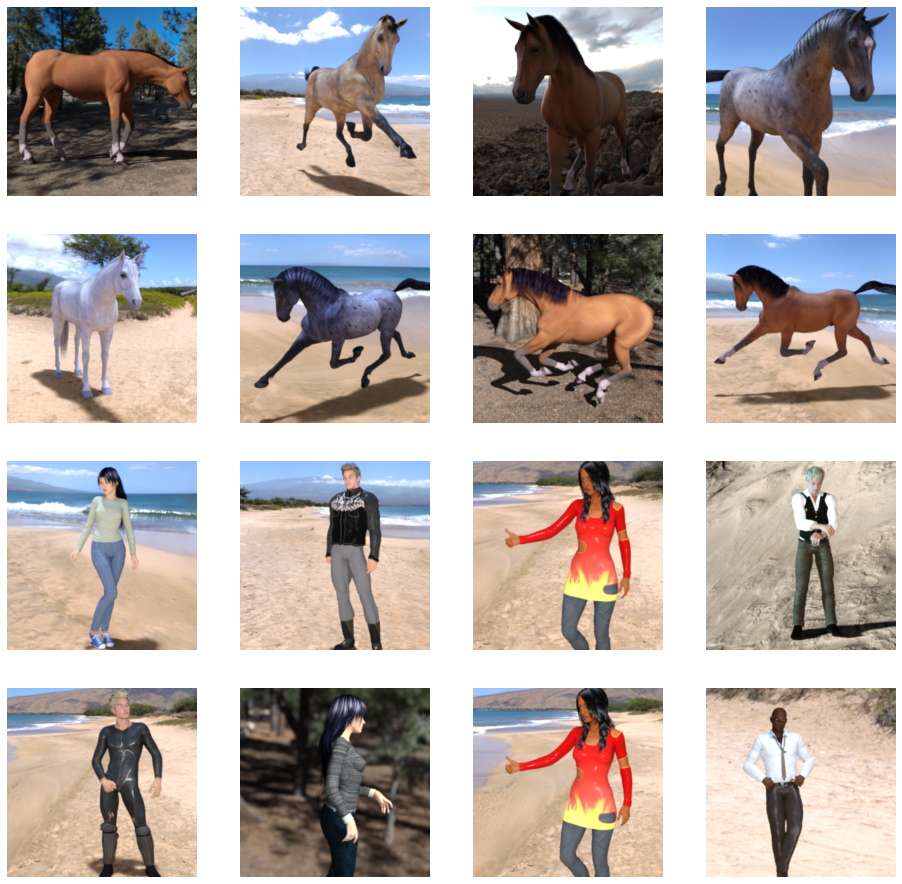

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [11]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
# Setting up the model 

model = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(32,(3,3),input_shape=(300,300,3),activation='relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Conv2D(16,(5,5),activation='relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 16)      12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [0]:
# Data Preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_gen = ImageDataGenerator(rescale=1/255)
validation_gen = ImageDataGenerator(rescale=1/255)

In [17]:
train_generator = train_gen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_gen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [18]:
model.fit_generator(
    train_generator,
    steps_per_epoch=15,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 15s 1s/step - loss: 1.2565 - accuracy: 0.5811 - val_loss: 0.5464 - val_accuracy: 0.7227
Epoch 2/15
15/15 [==============================] - 14s 955ms/step - loss: 1.5777 - accuracy: 0.7749 - val_loss: 0.7929 - val_accuracy: 0.6680
Epoch 3/15
15/15 [==============================] - 14s 940ms/step - loss: 0.2422 - accuracy: 0.9048 - val_loss: 1.2356 - val_accuracy: 0.8203
Epoch 4/15
15/15 [==============================] - 15s 1s/step - loss: 0.2804 - accuracy: 0.8864 - val_loss: 0.6610 - val_accuracy: 0.9023
Epoch 5/15
15/15 [==============================] - 14s 954ms/step - loss: 0.6037 - accuracy: 0.8713 - val_loss: 0.7011 - val_accuracy: 0.8672
Epoch 6/15
15/15 [==============================] - 14s 945ms/step - loss: 0.1748 - accuracy: 0.9216 - val_loss: 0.9078 - val_accuracy: 0.8398
Epoch 7/15
15/15 [==============================] - 15s 1s/step - loss: 

Saving horse.jpeg to horse (2).jpeg
[0.]
horse.jpeg is a horse


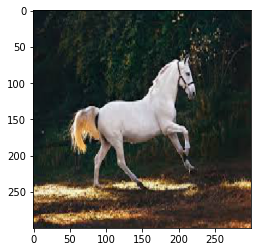

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  plt.imshow(img)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


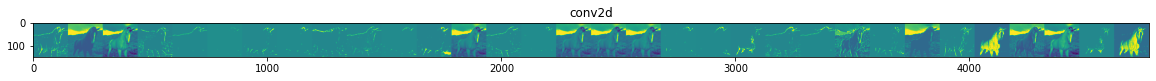

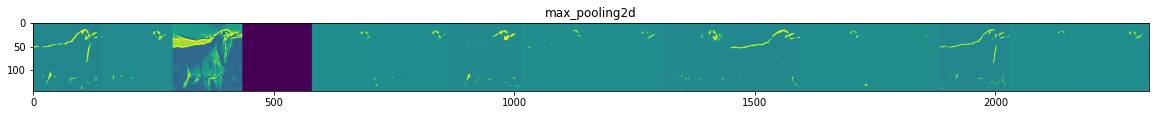

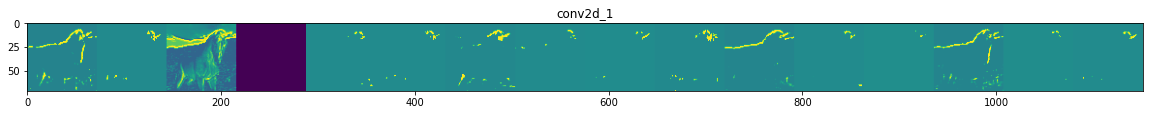

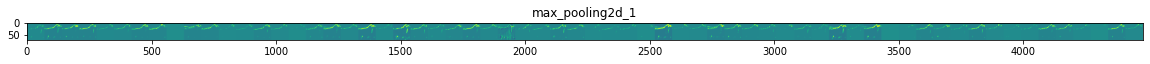

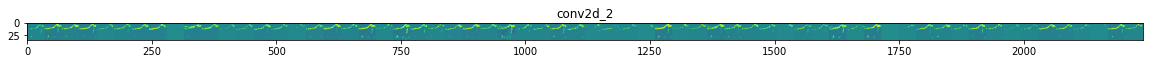

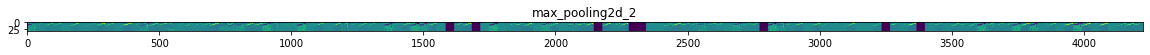

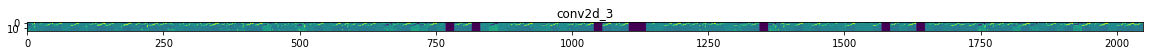

In [23]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')